# <span style = 'color:#4415CC'> Credit Score Classification </span>

# <span style = 'color:#4415CC'> Index </span>


* [Summary](#summary)
* [Libraries](#libraries)
* [Load Data](#load_data)
* [EDA](#eda)
    * [Preview](#preview)
    * [Helper Functions](functions)
    * [Categorical Variables](#categorical_variables)
    * [Numerical Variables](#numerical_variables)
* [Transformation](#transformation)
* [Models](#models)

## <span style = 'color:#4415CC'> 1. Summary </span> <a class = "anchor" id = "summary"></a>


## <span style = 'color:#4415CC'> 2. Libraries </span> <a class = "anchor" id = "libraries"></a>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <span style = 'color:#4415CC'> 3. Load Data </span> <a class = "anchor" id = "Load"></a>

In [3]:
df_train_original = pd.read_csv('../input/credit-score-classification/train.csv')
df_train = df_train_original.copy()

/tmp/ipykernel_20/2880817523.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_original = pd.read_csv('../input/credit-score-classification/train.csv')


## <span style = 'color:#4415CC'> 4. EDA </span> <a class = "anchor" id = "eda"></a>

### <span style = 'color:#4415CC'> I. Preview Dataset </span> <a class = "anchor" id = "preview"></a>

In [4]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
# Check Data Size
print("Train Data Size: ", df_train.shape)

Train Data Size:  (100000, 28)


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

**Observations:**

1. There are missing Values in some of the columns:
- Name; Monthly Inhand Salary; Type of Loan, etc.
2. The dataset has both numerical and string values.

3. Some values potentially need data type transformation
- Annual Income, Credit History Age, Monthly Balance, on a first glance.

In [7]:
# Check Values for fields with numerical types
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [8]:
# Statistical Values for non-numerical fields:
df_train.describe(exclude = np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


**Observations:**
1. We need to deal with outliers in some numerical fields.
2. Customer_ID has only 12500 unique values => 12500 customers
3. Month has 8 unique values, need to analyze which months are missing.
3. Age has 1788 unique values, given the normal human lifespan, this needs to be accounted for.
4. SSN has 12501 unique values, given 12500 customers, 

### <span style = 'color:#4415CC'> II. Helper Functions </span> <a class = "anchor" id = "functions"></a>

In [9]:
def col_details(df, column):
    print("Details of", column, "column with a DataType: ", df[column].dtype)
    
    # Check for null values
    null_count = df[column].isnull().sum()
    if null_count == 0:
        print("\nNo null values")
    else: print("\nThere are ", null_count, " null values")
        
    #Number of Unique Values
    print("\nNumber of Unique Values: ", df[column].nunique())
    
    #Column Distribution
    print("\nColumn Distribution:\n")
    print(df[column].value_counts())

In [10]:
def fillna_with_group_mode(df, groupby, column):
    print("\n # of missing values before filling with group mode: ", df[column].isnull().sum())
    
    # Fill with local mode
    group_mode = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0])
    df[column] = df[column].fillna(group_mode)
    
    print("\n # of missing values after fill:", df[column].isnull().sum())

In [11]:
def clean_categorical_field(df, groupby, column, replace_value = None):
    print("\n-----------------------\/------------------------------")
    
    # Replace with dummy value
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced")

    fillna_with_group_mode(df,groupby,column)

In [12]:
# As we saw in the first observation, we need to handle Outliers
# this functions will handle those and missing values for a column.
def fix_inconsistent_values(df, groupby, column):
    print("\n Current Min, Max Values: ", df[column].apply([min, max]), sep = '\n', end = '\n')
    
    df_drop = df[df[column].notna()].groupby(groupby)[column].apply(list)
    x, y = df_drop.apply(lambda x: stats.mode(x)).apply([min, max])
    mini, maxi = x[0][0], y[0][0]
    
    # Assign NaN to inconsistencies
    col = df[column].apply(lambda x: np.NaN if ((x < mini) | (x > maxi) | x < 0) else x)
    
    # Fill with local mode
    group_mode = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    df[column] = col.fillna(group_mode)
    df[column].fillna(df[column].mean(), inplace = True)
    
    print("\nAfter Cleaning Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n') 
    print("\nNo. of Unique values after Cleaning:",df[column].nunique())
    print("\nNo. of Null values after Cleaning:",df[column].isnull().sum())

In [13]:
def clean_numerical_field(df, groupby, column, strip = None, datatype = None, replace_value = None):
    
    # Replace with dummy value
    if replace_value != None:
        df[column] = df[column].replace(replace_value, np.nan)
        print(f"\nGarbage value {replace_value} is replaced")
        
    fix_inconsistent_values(df, groupby, column)    

In [14]:
def countplot(df, column, display_name, rotation = 0):
    palette = "deep"
    sns.set_palette(palette)
    
    sns.countplot(data = df, x = column)
    
    plt.xlabel(f'{display_name}')
    plt.ylabel('Record Count')
    plt.title(f'\n{display_name} Distribution')
    plt.xticks(rotation = rotation)
    
    plt.show()

In [15]:
def displot(df, column, display_name, rotation = 0, bins = 20):
    print("\n-----------------------\/------------------------------")
    palette = 'deep'
    sns.set_palette(palette)
    
    sns.displot(data = df, x = column, kde = True, bins = bins)
    
    plt.xlabel(f'\n{display_name} Distribution')
    plt.ylabel('Number of Records')
    plt.title(f'{display_name} Distribution')
    plt.xticks(rotation=rotation)
    
    plt.show()

In [16]:
def stacked_bar(df, column1, column2, rotation = 0):
    palette = "deep"
    sns.set_palette(palette)
    
    pd.crosstab(df[column1], df[column2]).plot(kind = 'bar', stacked = True)
    
    plt.xlabel(f'{column1}')
    plt.ylabel('Record Count')
    plt.title(f'\n{column1} & {column2} Distribution')
    plt.xticks(rotation = rotation)
    
    plt.show()

### <span style = 'color:#4415CC'> III. Categorical Variables </span> <a class = "anchor" id = "categorical_variables"></a>

### ID
**Summary**

Distinct records - 10,000

No null values.

In [17]:
# Details
col_details(df_train, 'ID')

Details of ID column with a DataType:  object

No null values

Number of Unique Values:  100000

Column Distribution:

0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64


In [18]:
# Details
col_details(df_train, 'Customer_ID')

Details of Customer_ID column with a DataType:  object

No null values

Number of Unique Values:  12500

Column Distribution:

CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64


### Customer ID
**Summary**

Unique records: 12,500

Customers can have different credit scores. For example, their credit score may change over time.

Details of Credit_Score column with a DataType:  object

No null values

Number of Unique Values:  3

Column Distribution:

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64


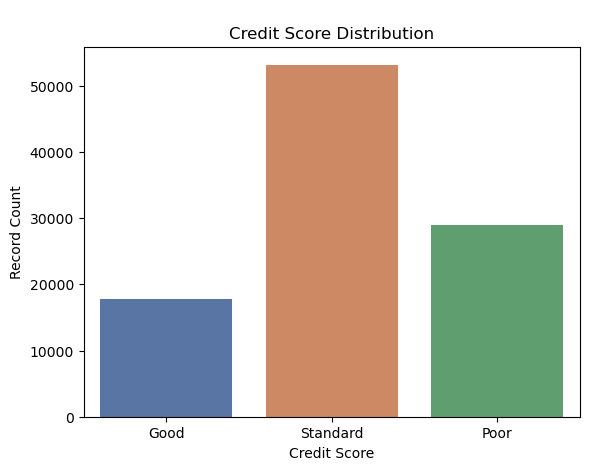

In [19]:
column_name = 'Credit_Score'
display_name = 'Credit Score'

# Details
col_details(df_train, column_name)

# Plot Graph
countplot(df_train, column_name, display_name)

### Credit Score
**Summary**
There are 3 unique credit scores - Standard, Good, Poor. 

No null values in the Credit Scores.

The distributions is: *Standard - 53%, Poor - 29% and Good - 17%*

Details of Month column with a DataType:  object

No null values

Number of Unique Values:  8

Column Distribution:

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64


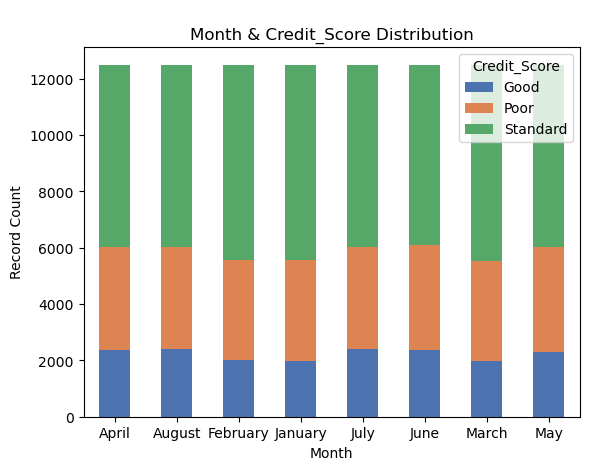

In [20]:
col_name = 'Month'

col_details(df_train, col_name)

stacked_bar(df_train, col_name, 'Credit_Score')

### Month

**Summary**

There are 8 months in the distribution Jan - Aug

The data type needs to be converted to datetime so we can use it for model building

**Summary**

There are 8 months in the distribution Jan - Aug

The data type needs to be converted to datetime so we can use it for model building

Similar distribution across months

In [21]:
# Convert to datetime
df_train['Month'] = pd.to_datetime(df_train.Month, format = '%B').dt.month

In [22]:
col_details(df_train, 'Name')

Details of Name column with a DataType:  object

There are  9985  null values

Number of Unique Values:  10139

Column Distribution:

Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: Name, Length: 10139, dtype: int64


### Name

**Summary**

9985 Null values

Assign the same name value to same Customer IDs

In [23]:
column_name = 'Name'
group_by = 'Customer_ID'

clean_categorical_field(df_train, group_by, column_name)


-----------------------\/------------------------------

 # of missing values before filling with group mode:  9985

 # of missing values after fill: 0


In [24]:
col_details(df_train,'SSN')

Details of SSN column with a DataType:  object

No null values

Number of Unique Values:  12501

Column Distribution:

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64


### Name

**Summary**
There are 5572 garbage values

Cleaning steps would be:
1. Remove the garbage values
2. Assign same SSN to each Cust ID

In [25]:
column_name = 'SSN'
group_by = 'Customer_ID'
garbage_value = '#F%$D@*&8'

clean_categorical_field(df_train, group_by, column_name, garbage_value)


-----------------------\/------------------------------

Garbage value #F%$D@*&8 is replaced

 # of missing values before filling with group mode:  5572

 # of missing values after fill: 0


### Occupation

In [26]:
col_details(df_train, 'Occupation')

Details of Occupation column with a DataType:  object

No null values

Number of Unique Values:  16

Column Distribution:

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64


**Summary**
Again, there is a garbage value '_____' in 7062 records

Cleaning Steps
1. Replace garbage value with np.nan (our dummy value)
2. Assign same Occupation for each Customer ID
3. Examine the distribution of Credit Score across occupations.


-----------------------\/------------------------------

Garbage value _______ is replaced

 # of missing values before filling with group mode:  7062

 # of missing values after fill: 0


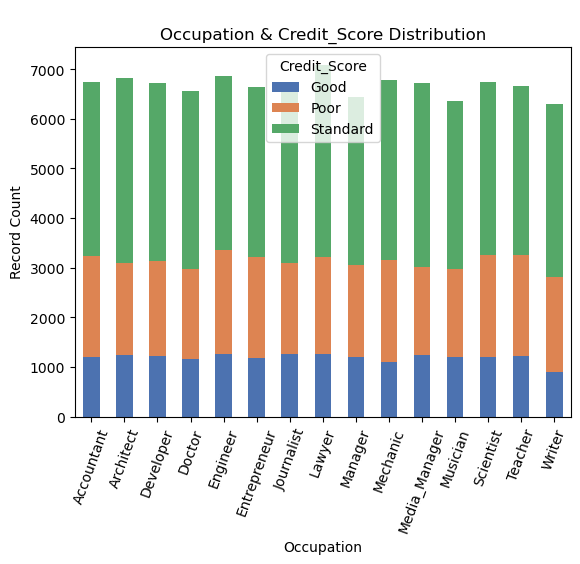

In [27]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'
display_name = 'Occupation'

clean_categorical_field(df_train, group_by, column_name, garbage_value)

# Plot
stacked_bar(df_train, column_name, 'Credit_Score', rotation = 70)

### Type of Loan

In [28]:
col_details(df_train, 'Type_of_Loan')

Details of Type_of_Loan column with a DataType:  object

There are  11408  null values

Number of Unique Values:  6260

Column Distribution:

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage 

**Summary**

There are 11408 null values and 6260 Unique Values

The unique values are the combinations of different loans, which is not an issue.

For the null values, we can map them to Not Specified, as it is the perfect category for the occasion.

In [29]:
df_train['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace = True)

### Credit Mix

In [30]:
col_details(df_train, 'Credit_Mix')

Details of Credit_Mix column with a DataType:  object

No null values

Number of Unique Values:  4

Column Distribution:

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64


**Summary**

3 Types - Standard, Good, Bad

20195 garbage values

Same cleaning steps as before:
1. Substitute the garbage value with np.nan
2. Assign Credit Mix value for each Customer ID


-----------------------\/------------------------------

Garbage value _ is replaced

 # of missing values before filling with group mode:  20195

 # of missing values after fill: 0


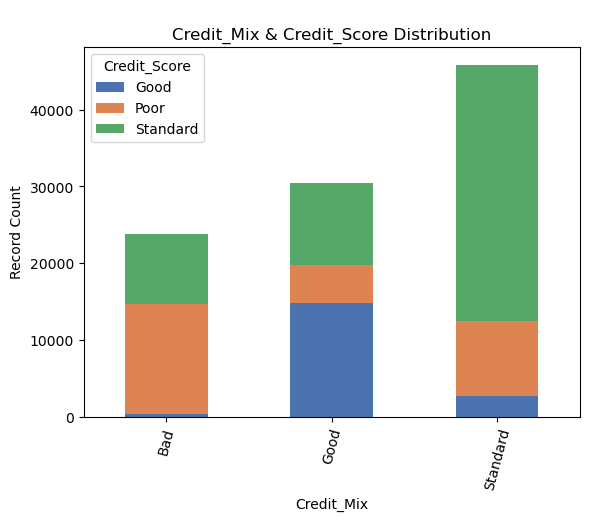

In [31]:
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'

clean_categorical_field(df_train, group_by, column_name, garbage_value)

#Plot
stacked_bar(df_train, column_name, 'Credit_Score', rotation = 75)

### Payment of Minimum Amount

In [32]:
col_details(df_train, 'Payment_of_Min_Amount')

Details of Payment_of_Min_Amount column with a DataType:  object

No null values

Number of Unique Values:  3

Column Distribution:

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64


**Summary**

3 unique values - Yes, No, Not Mentioned

With a distribution of - 52%, 35% and 12%

No missing values

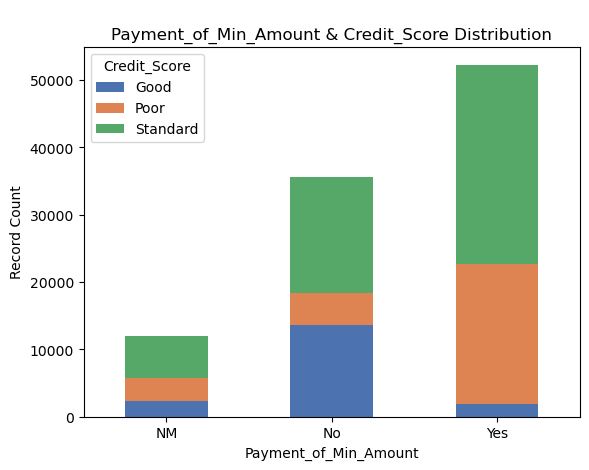

In [33]:
stacked_bar(df_train, 'Payment_of_Min_Amount', 'Credit_Score')

### Payment Behaviour

In [34]:
col_details(df_train, 'Payment_Behaviour')

Details of Payment_Behaviour column with a DataType:  object

No null values

Number of Unique Values:  7

Column Distribution:

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64


**Summary**

There are 6 unique values, a mixture between Low or High spending and Small,Medium,Large payment values

7,600 garbage values

*Same cleaning steps*


-----------------------\/------------------------------

Garbage value !@9#%8 is replaced

 # of missing values before filling with group mode:  7600

 # of missing values after fill: 0


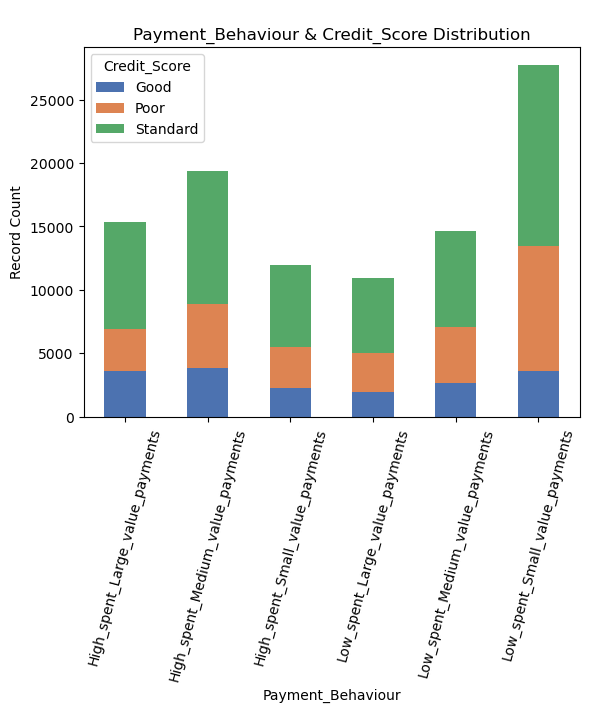

In [35]:
col_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

# Cleaning
clean_categorical_field(df_train, group_by, col_name, garbage_value)

# Plot
stacked_bar(df_train, col_name, 'Credit_Score', rotation = 75)